In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accuracy: 0.9658792650918635
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Confusion Matrix:
 [[1122   35]
 [  43 1086]]


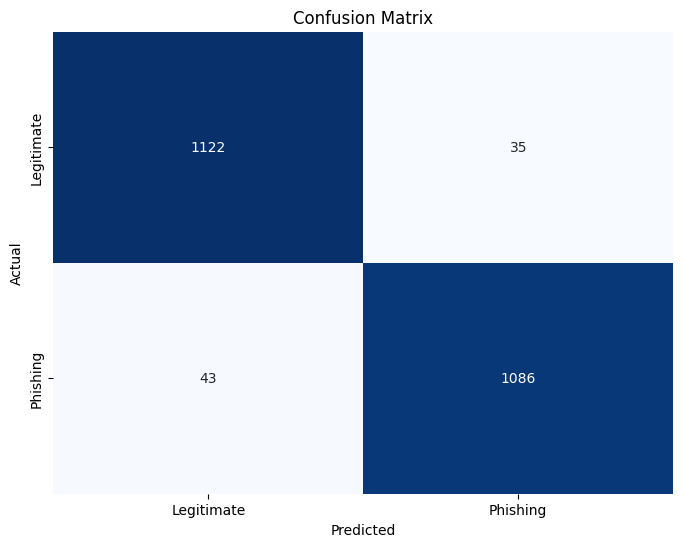

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/dataset1.csv'
df = pd.read_csv(file_path)


# Display the first few rows of the dataset
df.head()

# Data Preprocessing
X = df.drop('status', axis=1)  # Features
y = df['status']  # Target variable

# Map 'legitimate' to 0 and 'phishing' to 1
y = y.map({'legitimate': 0, 'phishing': 1})

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

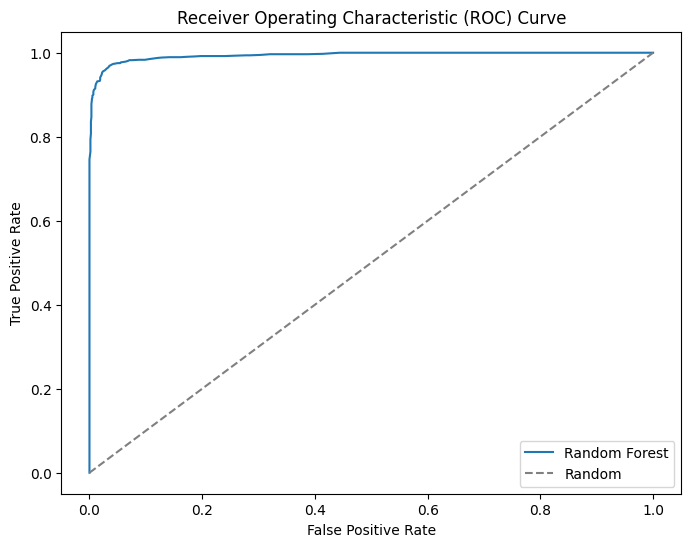

In [6]:
# Plot ROC Curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()




In [7]:
# Install SHAP if not already installed
!pip install shap


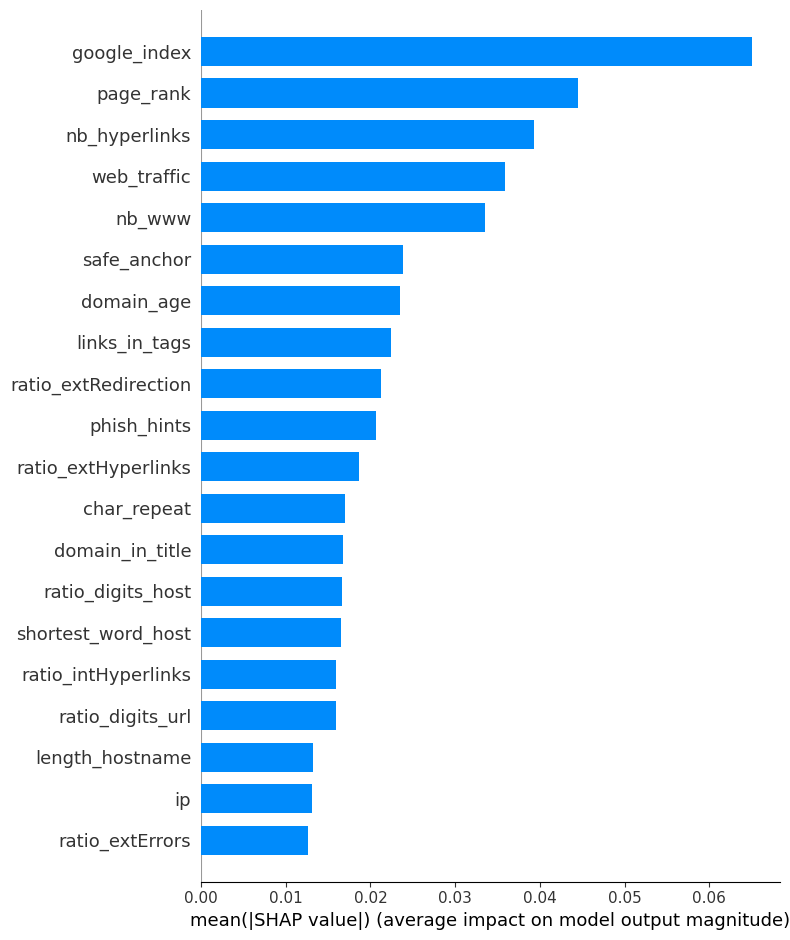

In [8]:
import shap

# Assuming 'model' is your trained Random Forest model
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent", check_additivity=False, model_output="raw")

# Explain the predictions of the test set
shap_values = explainer.shap_values(X_test, approximate=True)

# Create a summary plot with SHAP values
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)

# Display the summary plot
plt.show()


In [17]:
import shap
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Random Forest model
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent", check_additivity=False, model_output="raw")

# Explain the predictions of the test set
shap_values = explainer.shap_values(X_test, approximate=True)

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = abs(shap_values[1]).mean(axis=0)

# Create a DataFrame with feature names and mean absolute SHAP values
shap_df = pd.DataFrame({'Feature': X_test.columns, 'Mean_SHAP_Value': mean_abs_shap_values})

# Display only the first 20 rows and 2 columns
print("Feature Names and Mean Absolute SHAP Values:")
print(shap_df.head(79)[['Feature', 'Mean_SHAP_Value']])


Feature Names and Mean Absolute SHAP Values:
            Feature  Mean_SHAP_Value
0        length_url         0.012450
1   length_hostname         0.013173
2                ip         0.013126
3           nb_dots         0.012097
4        nb_hyphens         0.008842
..              ...              ...
74      safe_anchor         0.023863
75      onmouseover         0.000031
76       right_clic         0.000088
77      empty_title         0.006017
78  domain_in_title         0.016716

[79 rows x 2 columns]


In [20]:
!pip install tabulate
import shap
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# Assuming 'model' is your trained Random Forest model
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent", check_additivity=False, model_output="raw")

# Explain the predictions of the test set
shap_values = explainer.shap_values(X_test, approximate=True)

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = abs(shap_values[1]).mean(axis=0)

# Create a DataFrame with feature names and mean absolute SHAP values
shap_df = pd.DataFrame({'Feature': X_test.columns, 'Mean_SHAP_Value': mean_abs_shap_values})

# Display the result in table format
table = tabulate(shap_df.head(100)[['Feature', 'Mean_SHAP_Value']], headers='keys', tablefmt='pretty', showindex=False)
print("Feature Names and Mean Absolute SHAP Values:")
print(table)


Feature Names and Mean Absolute SHAP Values:
+------------------------------------------------------------------------------------------------------------------------------------+------------------------+
|                                                              Feature                                                               |    Mean_SHAP_Value     |
+------------------------------------------------------------------------------------------------------------------------------------+------------------------+
|                                                             length_url                                                             |  0.012450273440549515  |
|                                                          length_hostname                                                           |  0.013172873039160704  |
|                                                                 ip                                                                 |  0.01312615073159021